## Karthika Pai

## Wine dataset
We will be looking at a dataset that consists of wine statistics by wine category.  

(1) Modify the following to see the head of the wine data file.  (You should specify the relative path of the data.)

In [3]:
!head wine.data.txt #wine.data.txt stored in the same place as my lab3 file

#The next 14 lines are the variable names, then the remaining lines are the data in csv
Wine Class
Alcohol
Malic acid
Ash
Alcalinity of ash
Magnesium
Total phenols
Flavanoids
Nonflavanoid phenols


As you can see, the first several lines are the variable names and the remainder is comma separated lines of numbers.  

(2) Create a file object with open(), and then read in the lines in sequence.  Disregard the first line, read the next 14 in and save the variable names in a list, and save the rest in a list of lists of numbers (each line forms a list by splitting by commas).

In [4]:
with open("wine.data.txt") as f:
    text = (f.readlines()[0:]) #read everything except first line
text = [y.strip() for y in text[:]] #strip of newline
heading = text[1:15]
data = text[15:]
data = [k.split(",") for k in data]
print heading
print data

['Wine Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
[['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28', '2.29', '5.64', '1.04', '3.92', '1065'], ['1', '13.2', '1.78', '2.14', '11.2', '100', '2.65', '2.76', '.26', '1.28', '4.38', '1.05', '3.4', '1050'], ['1', '13.16', '2.36', '2.67', '18.6', '101', '2.8', '3.24', '.3', '2.81', '5.68', '1.03', '3.17', '1185'], ['1', '14.37', '1.95', '2.5', '16.8', '113', '3.85', '3.49', '.24', '2.18', '7.8', '.86', '3.45', '1480'], ['1', '13.24', '2.59', '2.87', '21', '118', '2.8', '2.69', '.39', '1.82', '4.32', '1.04', '2.93', '735'], ['1', '14.2', '1.76', '2.45', '15.2', '112', '3.27', '3.39', '.34', '1.97', '6.75', '1.05', '2.85', '1450'], ['1', '14.39', '1.87', '2.45', '14.6', '96', '2.5', '2.52', '.3', '1.98', '5.25', '1.02', '3.58', '1290'], ['1', '14.06', '2.15'

(3) Import numpy and save the list of lists as an array object, where the entries are floats.

In [5]:
import numpy as np
data = np.array(data, dtype=float)

(4) Print the sample mean and standard deviations of each column (variable).

In [6]:
meanarray = np.mean(data, axis = 0)  #make std and mean array
stdarray = np.std(data, axis = 0)
for col in xrange(14):
    print "sample mean of " + heading[col] + " is " + str(meanarray[col])
    print "standard deviation of " + heading[col] + " is " + str(stdarray[col])

sample mean of Wine Class is 1.93820224719
standard deviation of Wine Class is 0.772854859112
sample mean of Alcohol is 13.0006179775
standard deviation of Alcohol is 0.809542914529
sample mean of Malic acid is 2.33634831461
standard deviation of Malic acid is 1.11400362698
sample mean of Ash is 2.36651685393
standard deviation of Ash is 0.273572294426
sample mean of Alcalinity of ash is 19.4949438202
standard deviation of Alcalinity of ash is 3.33016975766
sample mean of Magnesium is 99.7415730337
standard deviation of Magnesium is 14.2423076734
sample mean of Total phenols is 2.29511235955
standard deviation of Total phenols is 0.624090564197
sample mean of Flavanoids is 2.02926966292
standard deviation of Flavanoids is 0.996048950379
sample mean of Nonflavanoid phenols is 0.361853932584
standard deviation of Nonflavanoid phenols is 0.124103259884
sample mean of Proanthocyanins is 1.5908988764
standard deviation of Proanthocyanins is 0.57074884862
sample mean of Color intensity is 5.

(5) Normalize the data matrix by subtracting each column mean and divide by the column standard deviation for each column.

In [7]:
data_copy = np.copy(data)
for row in xrange(178):
    for col in xrange(14):
        data_copy[row][col] = (data_copy[row][col] - meanarray[col])/stdarray[col] #normalize

(6) Save the number of rows of the matrix as n.

In [8]:
rows, columns = data_copy.shape
print rows

178


(7) The correlation matrix of a normalized matrix X can be computed as $$\frac{1}{n-1}X^\top X$$  Compute this. 

In [9]:
q = np.dot(np.transpose(data_copy), data_copy)
Cov = q/(178-1)
Cov

array([[ 1.00564972, -0.3300763 ,  0.44024952, -0.04992369,  0.52078487,
        -0.21036119, -0.72322641, -0.85228566,  0.49187249, -0.50194977,
         0.26716852, -0.62085717, -0.79268286, -0.63729711],
       [-0.3300763 ,  1.00564972,  0.09493026,  0.21273976, -0.31198788,
         0.27232816,  0.29073446,  0.23815287, -0.15681042,  0.13747022,
         0.549451  , -0.07215255,  0.07275191,  0.64735687],
       [ 0.44024952,  0.09493026,  1.00564972,  0.16497228,  0.29013035,
        -0.05488343, -0.3370606 , -0.41332866,  0.29463237, -0.22199334,
         0.25039204, -0.56446685, -0.37079354, -0.19309537],
       [-0.04992369,  0.21273976,  0.16497228,  1.00564972,  0.44587209,
         0.28820583,  0.12970824,  0.11572743,  0.1872826 ,  0.00970647,
         0.2603499 , -0.07508874,  0.00393333,  0.22488969],
       [ 0.52078487, -0.31198788,  0.29013035,  0.44587209,  1.00564972,
        -0.0838039 , -0.32292752, -0.353355  ,  0.36396647, -0.19844168,
         0.01883781, -0.27

(8) Use the following code to print an image that corresponds to the correlation matrix.

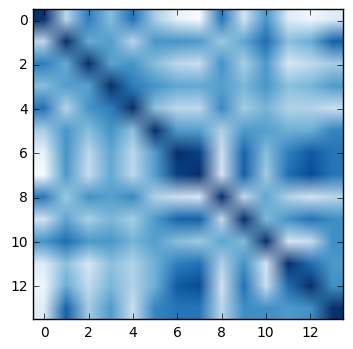

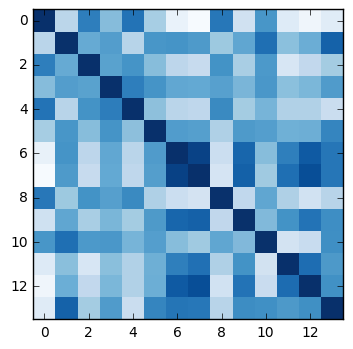

In [10]:
from matplotlib import pyplot as plt
plt.imshow(Cov, interpolation= None, cmap ='Blues')
plt.show()
plt.imshow(Cov, interpolation='none', cmap='Blues')
plt.show()

The following computes F-scores for individual ANOVAs for each variable by class.  If you get finished early try to figure out what's going on.

In [11]:
X = np.copy(data)
n = 178
N = np.array([(X[:,0] == i+1).sum() for i in range(3)]) 
V = np.array([X[X[:,0] == i+1,1:].var(axis=0) for i in range(3)]) ## calculates variance for each of 3 categories
M = np.array([X[X[:,0] == i+1,1:].mean(axis=0) for i in range(3)]) ##calculates mean for each of 3 categories
Bvar = (((M - X[:,1:].mean(axis=0))**2.).T * N).sum(axis=1) / 2
Wvar = (V.T * (N-1)).sum(axis=1) / (n - 3)
F = Bvar / Wvar
print F

[ 137.3861116    37.58265615   13.5260966    36.35357397   12.62981408
   95.24380219  237.53617769   28.0471868    30.76266898  122.99581166
  102.9202907   192.99700461  211.40023981]
